In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 이미지 타입, 크기 확인

In [62]:
img_path = './data/cat.png'
img = cv2.imread(img_path)

In [3]:
# 타입 크기 확인
image_type = type(img)
image_height, image_width, image_channel = img.shape
print('이미지 타입: ',image_type)
print('이미지 크기: ', image_height, image_width, image_channel)
print(img.shape)

이미지 타입:  <class 'numpy.ndarray'>
이미지 크기:  162 310 3
(162, 310, 3)


# 이미지 확인하기 후 사이즈 변경

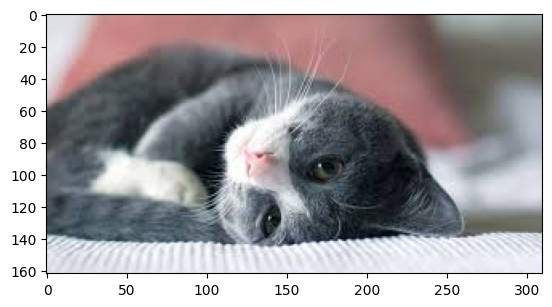

이미지 크기:  224 224


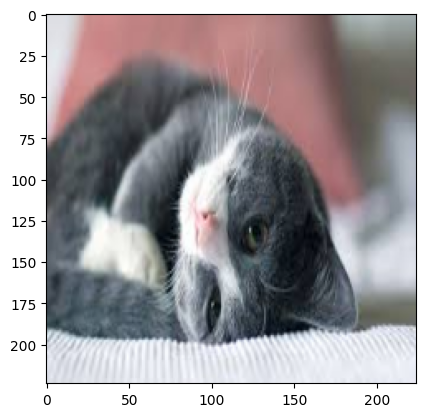

In [4]:
img_path = './data/cat.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# 사이즈 변경
img_resize = cv2.resize(img, (224,224))
image_height, image_width, image_channel = img_resize.shape
print('이미지 크기: ', image_height, image_width)

plt.imshow(img_resize)
plt.show()

In [5]:
# 이미지 저장
img_resize = cv2.cvtColor(img_resize, cv2.COLOR_BGR2RGB)
cv2.imwrite('./data/resize_img.png', img_resize)

True

# 이미지 자르기 (crop)

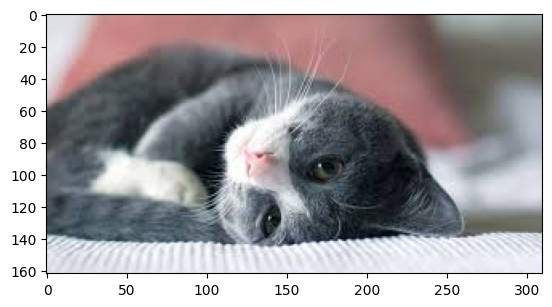

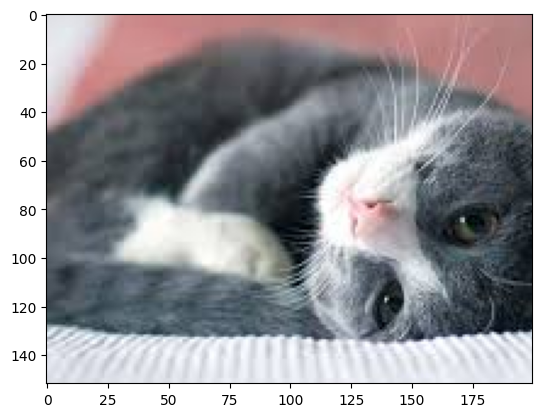

In [7]:
# 이미지 크롭
# [start : end : step ]
img_cropped = img[10:,:200]

plt.imshow(img)
plt.show()
plt.imshow(img_cropped)
plt.show()

# 좌표로 이미지 자르기

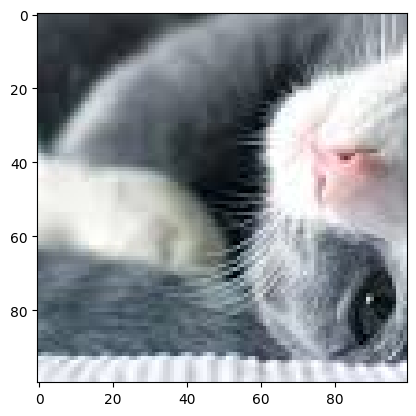

In [8]:
x1, y1 = 50,50
x2, y2 = 150,150

cropped_img = img[y1:y2, x1:x2]
plt.imshow(cropped_img)
plt.show()

# 이미지 blur 처리

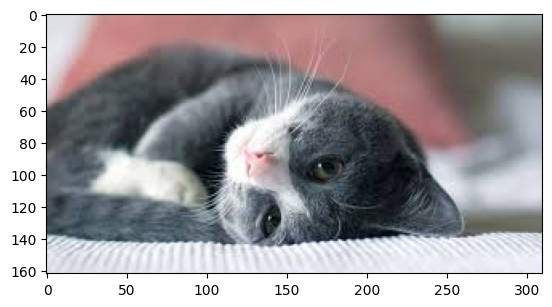

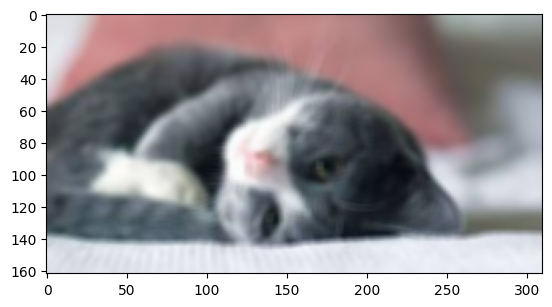

In [10]:
img_blurry = cv2.blur(img, (5,5)) # 5x5 커널 평균값으로 많이 사용

plt.imshow(img)
plt.show()

plt.imshow(img_blurry)
plt.show()

# 커스텀 blur

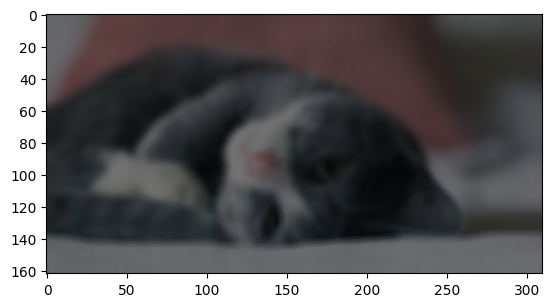

In [15]:
kernel = np.ones((6,6)) / 80.0 #모두 더하면 1이되도록 정규화

img_custom_blur = cv2.filter2D(img, -1, kernel)
plt.imshow(img_custom_blur)
plt.show()

# 가우시안 blur

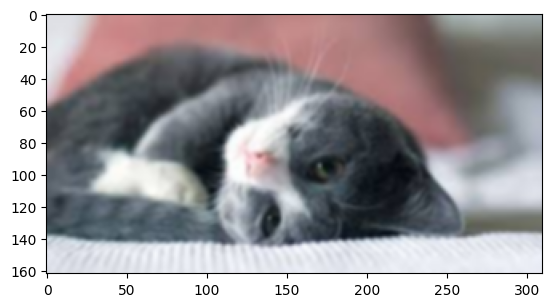

In [16]:
img_gaussianBlur = cv2.GaussianBlur(img, (5,5),0)

plt.imshow(img_gaussianBlur)
plt.show()

# 이미지를 선명하게 표현

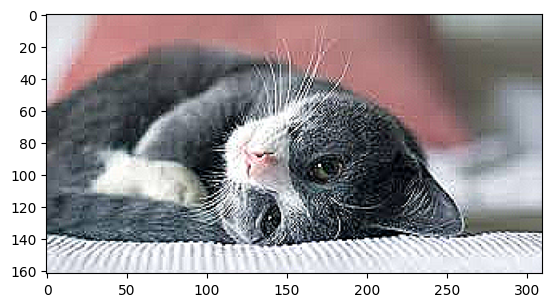

In [18]:
kernel = np.array([[0,-1,0],
                 [-1,5,-1],
                 [0,-1,0]])

img_sharp = cv2.filter2D(img,-1,kernel)

plt.imshow(img_sharp)
plt.show()

# 이미지 대비 높히기

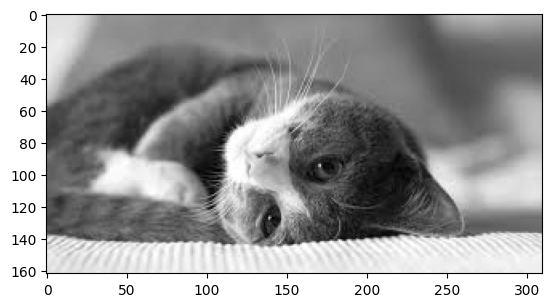

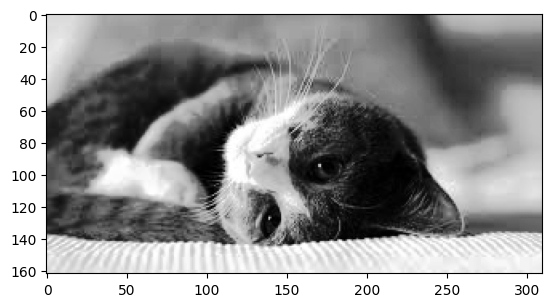

In [63]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

img_enhanced = cv2.equalizeHist(img_gray)

plt.imshow(img_gray, 'gray')
plt.show()

plt.imshow(img_enhanced, 'gray')
plt.show()

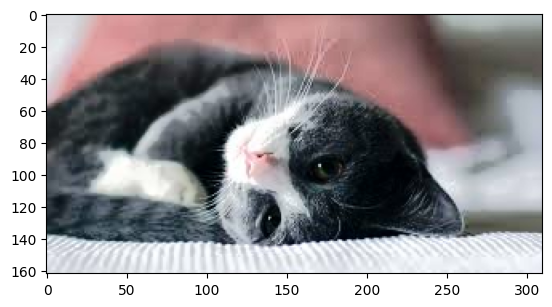

In [29]:
# 컬러 이미지
# YUV 이미지로 변환
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

# 평활화 적용
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# RGB로 다시변환
img_rgb = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

plt.imshow(img_rgb)
plt.show()

# 이미지 이진화

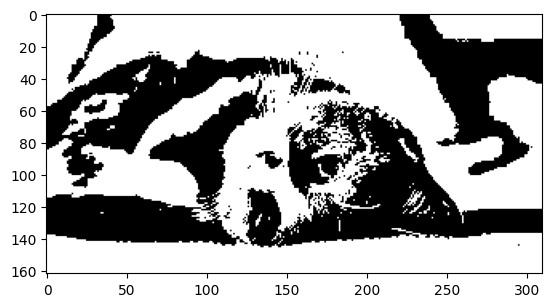

In [37]:
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
img_binarized = cv2.adaptiveThreshold(img_gray, max_output_value, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
                                      neighborhood_size, subtract_from_mean)

plt.imshow(img_binarized, 'gray')
plt.show()

# 이미지 회전

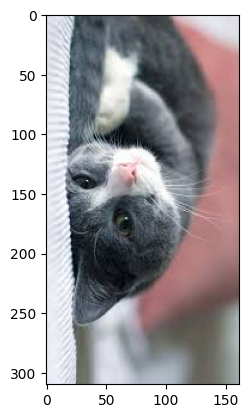

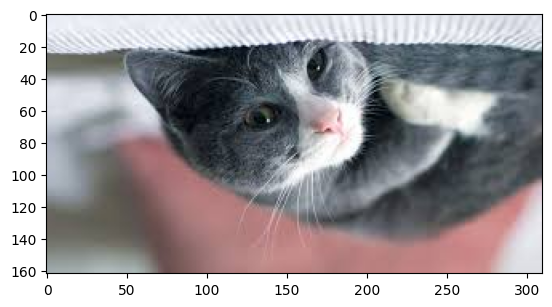

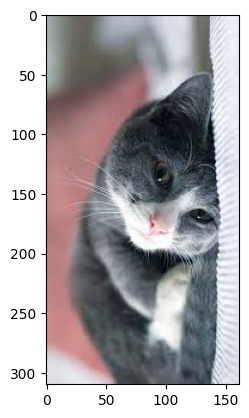

In [40]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
img_180 = cv2.rotate(img, cv2.ROTATE_180)
img_270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(img_90)
plt.show()
plt.imshow(img_180)
plt.show()
plt.imshow(img_270)
plt.show()

# 이미지 상하좌우 반전

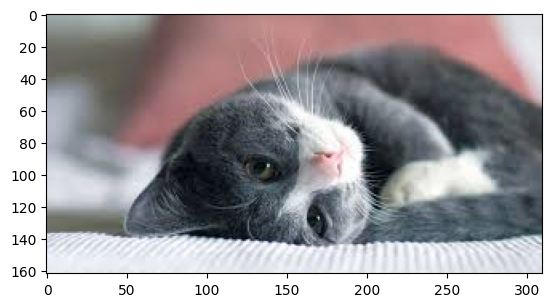

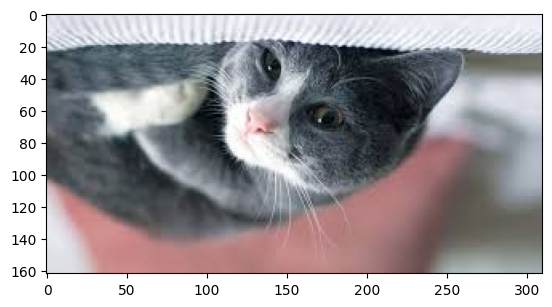

In [43]:
img_1 = cv2.flip(img, 1)
img_2 = cv2.flip(img, 0)

plt.imshow(img_1)
plt.show()
plt.imshow(img_2)
plt.show()

# 배경 제거

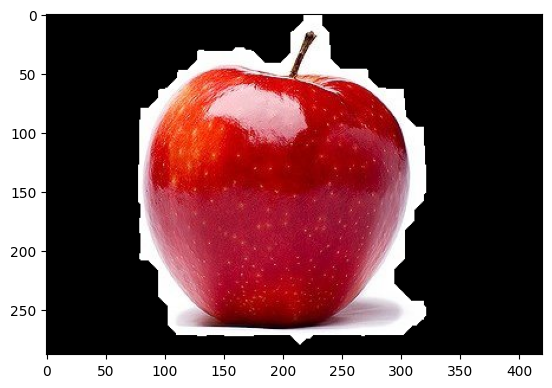

In [60]:
img = cv2.imread('./data/apple.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rectangle = (0,0,399,1000)   # 사각형 좌표 = (시작점 x, y, 넓이, 너비)

# 초기 마스크 생성
mask = np.zeros(img.shape[:2], np.uint8)

# grabCut에 활용할 임시 배열 생성
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

# grabCut 실행
cv2.grabCut(img, mask, rectangle, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

img_rgb_nobg = img * mask2[:,:,np.newaxis]

plt.imshow(img_rgb_nobg)
plt.show()

# 경계선 감지

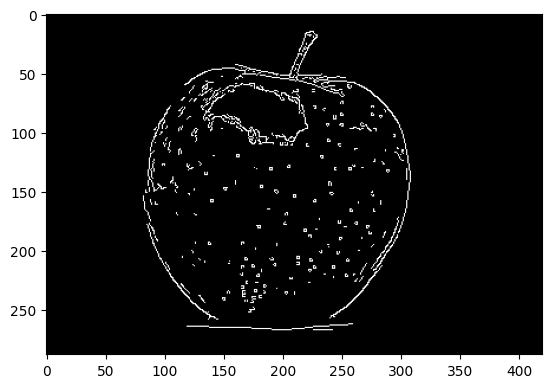

In [65]:
img_gray = cv2.imread('./data/apple.png', cv2.IMREAD_GRAYSCALE) 

# 픽셀 강도의 중앙값 계산
median_intensity = np.median(img_gray)

# 중간픽셀 강도에서 위아래 1표준편차 떨어진 지점을 임계값으로 지정
lower_threshold = int(max(0, (1.0-0.33) * median_intensity))
# 이 식에서는 0.33을 중간 강도에서 뺀 후, 0과의 최댓값을 취합니다. 이렇게 함으로써 중간 강도의 44% 아래 값을 하한값으로 설정합니다. 
# 하한값은 0 미만으로 설정되지 않도록 하기 위한 것입니다.
upper_threshold = int(min(255, (1.0+0.33) * median_intensity))
# 이 식에서는 0.33을 중간 강도에서 뺀 후, 255과의 최소값을 취합니다. 이렇게 함으로써 중간 강도의 44% 아래 값을 상한값으로 설정합니다. 
# 상한값은 255 초과 x

# Canny edge detection 적용
img_canny = cv2.Canny(img_gray, lower_threshold, upper_threshold)

plt.imshow(img_canny,'gray')
plt.show()

# 모서리 감지

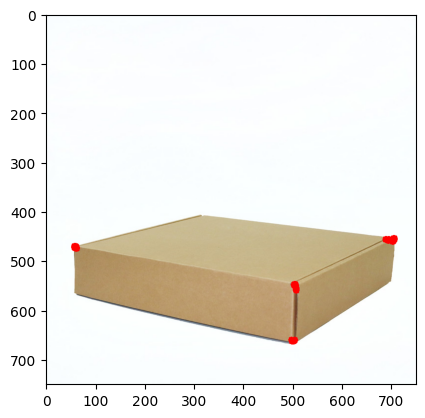

In [80]:
img_path = './data/box.png'
img = cv2.imread(img_path)

img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_gray = np.float32(img_gray)

block_size = 4   # 모서리 감지 매개 변수
aperture = 29
free_parameter = 0.04

detector_responses = cv2.cornerHarris(img_gray, block_size, aperture, free_parameter) #모서리 감지

detector_responses = cv2.dilate(detector_responses, None)  # 모서리 표시 부각

# 임계값 보다 큰 감지 결과만 남기고 빨간색으로 표시
threshold = 0.01
for i in range(detector_responses.shape[0]):
    for j in range(detector_responses.shape[1]):
        if detector_responses[i,j] > threshold * detector_responses.max():
            cv2.circle(img, (j,i), radius=5, color=(0,0,255), thickness=-1)
            
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

# 머신러닝 특성 만들기 (flatten)

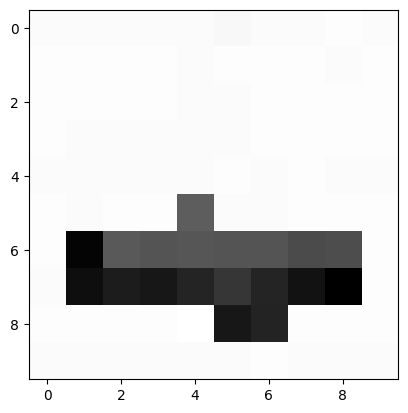

In [81]:
image_10x10 = cv2.resize(img_gray,(10,10))
image_10x10.flatten()

plt.imshow(image_10x10, 'gray')
plt.show()

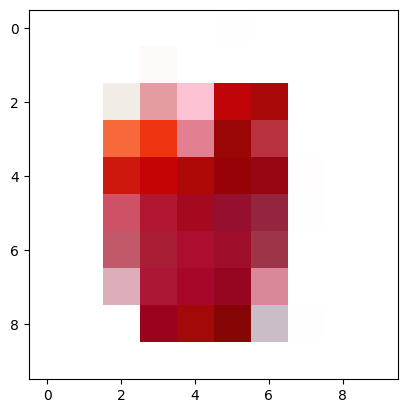

In [95]:
# RGB 이미지 1차원 벡터로 전환
img_255x255 = cv2.resize(img, (10,10))
img_255x255.flatten().shape

plt.imshow(img_255x255)
plt.show()

# 평균 색을 특성으로 인코딩

In [85]:
img_path = './data/apple.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 평균색 특성 인코딩
channels = cv2.mean(img)
print(channels)

(228.31011904761905, 183.62256944444445, 187.0489996693122, 0.0)
